In [1]:
import numpy as np
import xmitgcm
import matplotlib.pyplot as plt

%matplotlib inline

# Quick analysis of the channel model simulations

Load the two simulations, do some cursory analysis, and plot the output.

We also need to do a bit of work to make the output from `pkg/layers` easier to interpret.

In [2]:
# output from pkg/layers doesn't come with a nice coordinate, so copy this from the config.
layer_bounds = np.array([-2.00, -1.75, -1.50, -1.25,
                        -1.00, -0.75, -0.50, -0.25,
                         0.00,  0.25,  0.50,  0.75,
                         1.00,  1.25,  1.50,  1.75,
                         2.00,  2.25,  2.50,  2.75,
                         3.00,  3.25,  3.50,  3.75,
                         4.00,  4.25,  4.50,   5.0,
                         5.5,    6.0,   6.5,   7.0,
                         7.5,    8.0,   8.5,   9.0,
                         9.5,   10.0,])
layer_centres = (layer_bounds[1:] + layer_bounds[:-1])/2

In [3]:
ds = xmitgcm.open_mdsdataset('../run/Diags', grid_dir='../run',
                             prefix=['state', '2D_diags', 'heat_3D', 'heat_2D', 'layDiag'])
# pkg/layers doesn't give a nice name for the layer coordinate
# We're using temperature to define the layers, so let's call it 'temperature'
ds = ds.rename({'_UNKNOWN_':'temperature'})
ds = ds.assign_coords(temperature=layer_centres)

ds_GM = xmitgcm.open_mdsdataset('../run_GM/Diags', grid_dir='../run_GM/',
                                prefix=['state', '2D_diags', 'heat_3D', 'heat_2D', 'layDiag', 'GM_diags'])
# pkg/layers doesn't give a nice name for the layer coordinate
ds_GM = ds_GM.rename({'_UNKNOWN_':'temperature'})
ds_GM = ds_GM.assign_coords(temperature=layer_centres)

/Users/doddridge/Documents/Edward/Code/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/Users/doddridge/Documents/Edward/Code/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)
/Users/doddridge/Documents/Edward/Code/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


In [4]:
ds

<xarray.Dataset>
Dimensions:      (XC: 20, XG: 20, YC: 40, YG: 40, Z: 49, Zl: 49, Zp1: 50, Zu: 49, temperature: 37, time: 1080)
Coordinates:
  * XC           (XC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 9.25e+05 9.75e+05
  * YC           (YC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 1.925e+06 1.975e+06
  * XG           (XG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 8.5e+05 9e+05 9.5e+05
  * YG           (YG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 1.85e+06 1.9e+06 1.95e+06
  * Z            (Z) >f8 -2.744 -8.584 -15.18 ... -3.758e+03 -3.908e+03
  * Zp1          (Zp1) >f8 0.0 -5.487 -11.68 ... -3.833e+03 -3.982e+03
  * Zu           (Zu) >f8 -5.487 -11.68 -18.67 ... -3.833e+03 -3.982e+03
  * Zl           (Zl) >f8 0.0 -5.487 -11.68 ... -3.535e+03 -3.684e+03 -3.833e+03
    rA           (YC, XC) >f8 dask.array<shape=(40, 20), chunksize=(40, 20)>
    dxG          (YG, XC) >f8 dask.array<shape=(40, 20), chunksize=(40, 20)>
    dyG          (YC, XG) >f8 dask.array<shape=(40, 20), chunksize=(40, 20)>
    Depth        (YC, XC) >

In [5]:
ds_GM

<xarray.Dataset>
Dimensions:      (XC: 20, XG: 20, YC: 40, YG: 40, Z: 49, Zl: 49, Zp1: 50, Zu: 49, temperature: 37, time: 1080)
Coordinates:
  * XC           (XC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 9.25e+05 9.75e+05
  * YC           (YC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 1.925e+06 1.975e+06
  * XG           (XG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 8.5e+05 9e+05 9.5e+05
  * YG           (YG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 1.85e+06 1.9e+06 1.95e+06
  * Z            (Z) >f8 -2.744 -8.584 -15.18 ... -3.758e+03 -3.908e+03
  * Zp1          (Zp1) >f8 0.0 -5.487 -11.68 ... -3.833e+03 -3.982e+03
  * Zu           (Zu) >f8 -5.487 -11.68 -18.67 ... -3.833e+03 -3.982e+03
  * Zl           (Zl) >f8 0.0 -5.487 -11.68 ... -3.535e+03 -3.684e+03 -3.833e+03
    rA           (YC, XC) >f8 dask.array<shape=(40, 20), chunksize=(40, 20)>
    dxG          (YG, XC) >f8 dask.array<shape=(40, 20), chunksize=(40, 20)>
    dyG          (YC, XG) >f8 dask.array<shape=(40, 20), chunksize=(40, 20)>
    Depth        (YC, XC) >

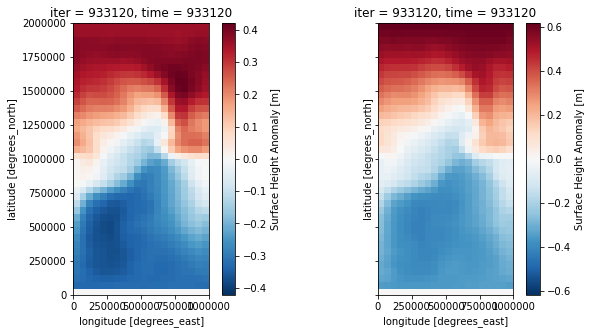

In [6]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['ETAN'][-1,:,:].plot(ax=axarr[0])
ds_GM['ETAN'][-1,:,:].plot(ax=axarr[1])

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')


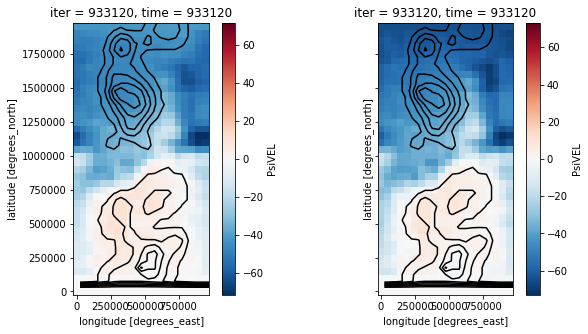

In [7]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

(ds['PsiVEL'][-1,:,:,:].sum(dim='Z')/1e6).plot(ax=axarr[0])
axarr[0].contour(ds['XC'], ds['YC'], ds['Depth'], np.arange(0,4000, 500), colors='k')
axarr[0].set_aspect('equal')

(ds_GM['PsiVEL'][-1,:,:,:].sum(dim='Z')/1e6).plot(ax=axarr[1])
axarr[1].contour(ds['XC'], ds['YC'], ds['Depth'], np.arange(0,4000, 500), colors='k')
axarr[1].set_aspect('equal')



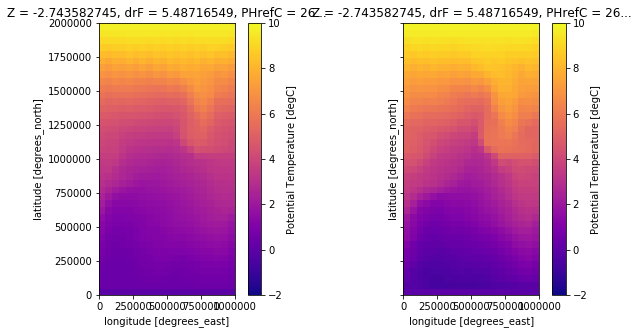

In [8]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['THETA'][-1,0,:,:].plot(ax=axarr[0], cmap='plasma', vmin=-2, vmax=10)
ds_GM['THETA'][-1,0,:,:].plot(ax=axarr[1], cmap='plasma', vmin=-2, vmax=10)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')



Text(0.5,0.98,'surface')

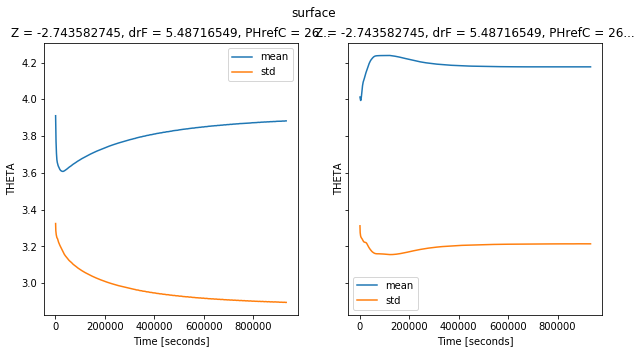

In [9]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))


ds['THETA'][:,0,:,:].mean(dim=['XC','YC']).plot(label='mean', ax=axarr[0])
ds['THETA'][:,0,:,:].std(dim=['XC','YC']).plot(label='std', ax=axarr[0])
axarr[0].legend()

ds_GM['THETA'][:,0,:,:].mean(dim=['XC','YC']).plot(label='mean', ax=axarr[1])
ds_GM['THETA'][:,0,:,:].std(dim=['XC','YC']).plot(label='std', ax=axarr[1])
axarr[1].legend()


fig.suptitle('surface')

Text(0.5,0.98,'Abyss')

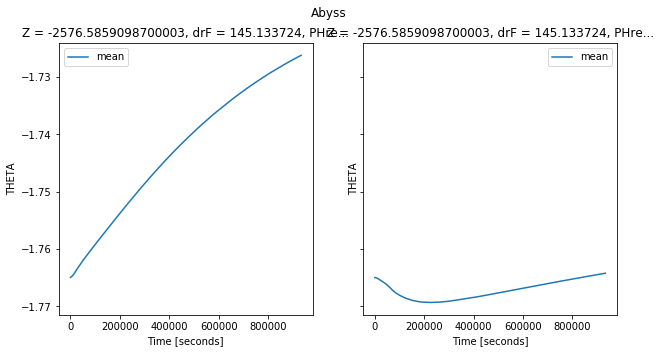

In [10]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))


ds['THETA'][:,-10,:,:].mean(dim=['XC','YC']).plot(label='mean', ax=axarr[0])
# ds['THETA'][:,-10,:,:].std(dim=['XC','YC']).plot(label='std', ax=axarr[0])
axarr[0].legend()

ds_GM['THETA'][:,-10,:,:].mean(dim=['XC','YC']).plot(label='mean', ax=axarr[1])
# ds['THETA'][:,-10,:,:].std(dim=['XC','YC']).plot(label='std', ax=axarr[0])
axarr[1].legend()

fig.suptitle('Abyss')

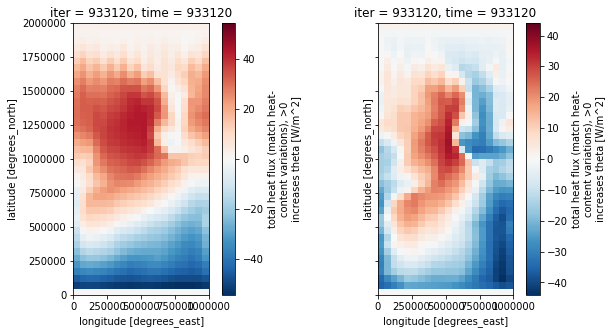

In [11]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['TFLUX'][-1,:,:].plot(ax=axarr[0])
ds_GM['TFLUX'][-1,:,:].plot(ax=axarr[1])
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

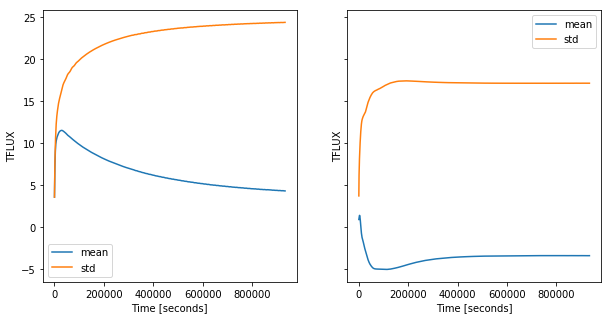

In [12]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['TFLUX'].mean(dim=['XC','YC']).plot(label='mean', ax=axarr[0])
ds['TFLUX'].std(dim=['XC','YC']).plot(label='std', ax=axarr[0])
axarr[0].legend()

ds_GM['TFLUX'].mean(dim=['XC','YC']).plot(label='mean', ax=axarr[1])
ds_GM['TFLUX'].std(dim=['XC','YC']).plot(label='std', ax=axarr[1])
axarr[1].legend()

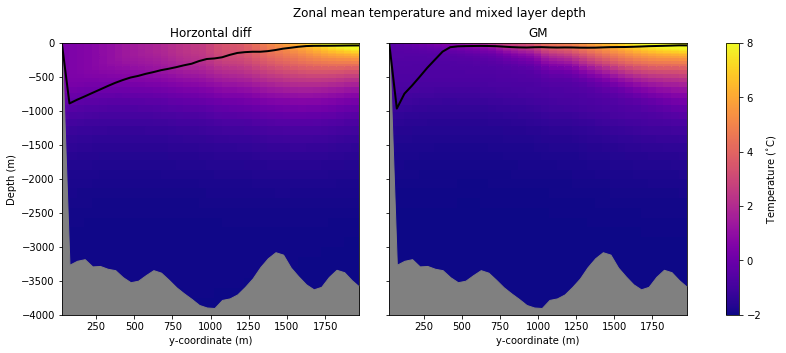

In [13]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(14,5))
fig.subplots_adjust(wspace=0.1)


axarr[0].pcolormesh(ds['YC']/1e3, ds['Z'],
                    ds['THETA'][-1,:,1:,:].where(ds['hFacC'][:,:,:]!=0).mean(dim='XC'),
                    cmap='plasma', vmin=-2, vmax=8)
axarr[0].plot(ds['YC']/1e3, (-ds['MXLDEPTH'][-1,:,:]).mean(dim='XC'), color='k', linewidth=2)
axarr[0].fill_between(ds['YC']/1e3, -4000, -ds['Depth'].mean(dim='XC'), color='grey')

axarr[0].set_xlabel('y-coordinate (m)')
axarr[0].set_ylabel('Depth (m)')
axarr[0].set_title('Horzontal diff')

axarr[0].set_ylim(-4000, 0)


im = axarr[1].pcolormesh(ds_GM['YC']/1e3, ds_GM['Z'],
                    ds_GM['THETA'][-1,:,1:,:].where(ds_GM['hFacC'][:,:,:]!=0).mean(dim='XC'),
                    cmap='plasma', vmin=-2, vmax=8)
CB = plt.colorbar(im, ax =axarr)
CB.ax.set_ylabel('Temperature ($^{\circ}$C)')
axarr[1].plot(ds_GM['YC']/1e3, (-ds_GM['MXLDEPTH'][-1,:,:]).mean(dim='XC'), color='k', linewidth=2)
axarr[1].fill_between(ds_GM['YC']/1e3, -4000, -ds_GM['Depth'].mean(dim='XC'), color='grey')
axarr[1].set_xlabel('y-coordinate (m)')
axarr[1].set_title('GM')

axarr[1].set_ylim(-4000, 0)



fig.suptitle('Zonal mean temperature and mixed layer depth')

fig.savefig('ZM_temperature_MLD.png', bbox_inches='tight', dpi=180)

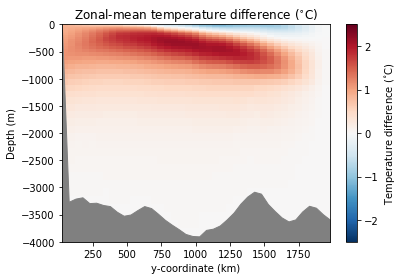

In [14]:
plt.pcolormesh(ds['YC']/1e3, ds['Z'], (ds['THETA']-ds_GM['THETA'])[-1,:,1:,:].mean(dim='XC'),
              cmap='RdBu_r', vmin=-2.5, vmax=2.5)
CB = plt.colorbar()
CB.ax.set_ylabel('Temperature difference ($^{\circ}$C)')
plt.fill_between(ds['YC']/1e3, -4000, -ds['Depth'].mean(dim='XC'), color='grey')

plt.ylim(-4000, 0)

plt.ylabel('Depth (m)')
plt.xlabel('y-coordinate (km)')
plt.title('Zonal-mean temperature difference ($^{\circ}$C)')

plt.savefig('ZM_temperature_difference.png', bbox_inches='tight', dpi=180)

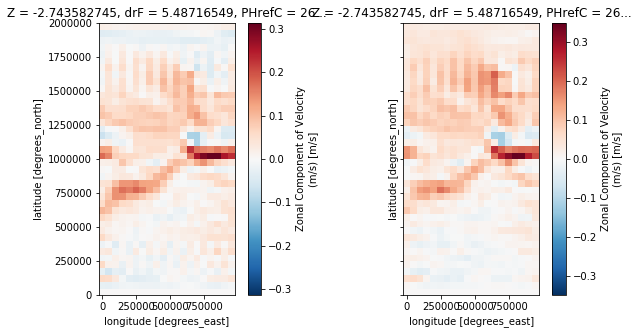

In [15]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['UVEL'][-1,0,:,:].plot(ax=axarr[0])
ds_GM['UVEL'][-1,0,:,:].plot(ax=axarr[1])

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

Text(0.5,0.98,'surface')

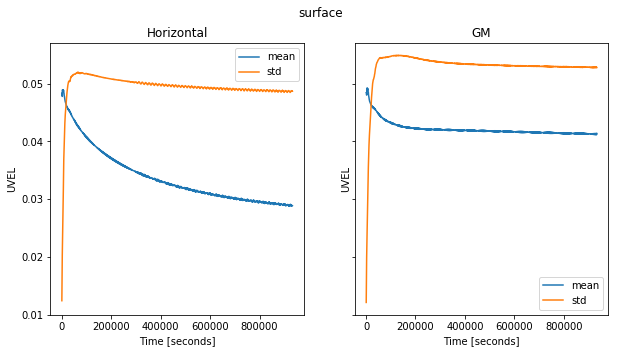

In [16]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['UVEL'][:,0,:,:].mean(dim=['XG','YC']).plot(label='mean', ax=axarr[0])
ds['UVEL'][:,0,:,:].std(dim=['XG','YC']).plot(label='std', ax=axarr[0])
axarr[0].legend()
axarr[0].set_title('Horizontal')

ds_GM['UVEL'][:,0,:,:].mean(dim=['XG','YC']).plot(label='mean', ax=axarr[1])
ds_GM['UVEL'][:,0,:,:].std(dim=['XG','YC']).plot(label='std', ax=axarr[1])
axarr[1].legend()
axarr[1].set_title('GM')

fig.suptitle('surface')

Text(0.5,0.98,'Abyss')

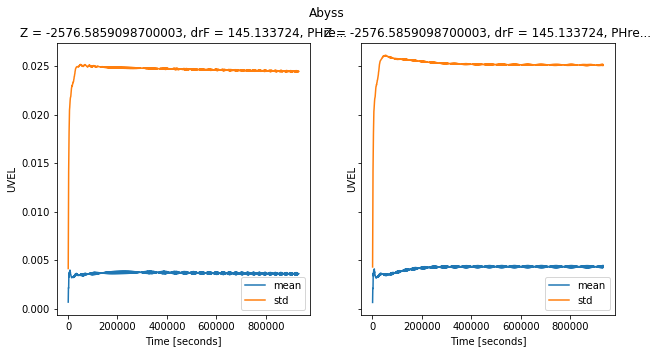

In [17]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['UVEL'][:,-10,:,:].mean(dim=['XG','YC']).plot(label='mean', ax=axarr[0])
ds['UVEL'][:,-10,:,:].std(dim=['XG','YC']).plot(label='std', ax=axarr[0])
axarr[0].legend()

ds_GM['UVEL'][:,-10,:,:].mean(dim=['XG','YC']).plot(label='mean', ax=axarr[1])
ds_GM['UVEL'][:,-10,:,:].std(dim=['XG','YC']).plot(label='std', ax=axarr[1])
axarr[1].legend()

fig.suptitle('Abyss')

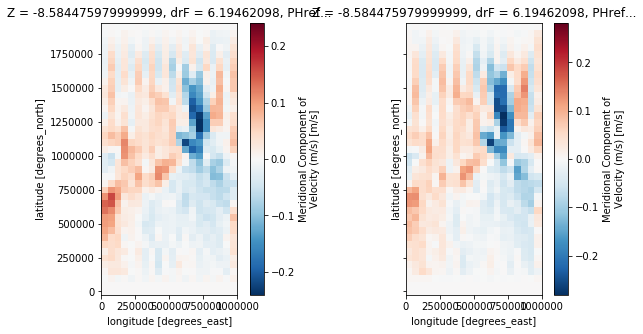

In [18]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['VVEL'][-1,1,:,:].plot(ax=axarr[0])
ds_GM['VVEL'][-1,1,:,:].plot(ax=axarr[1])

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

Text(0.5,0.98,'Abyss')

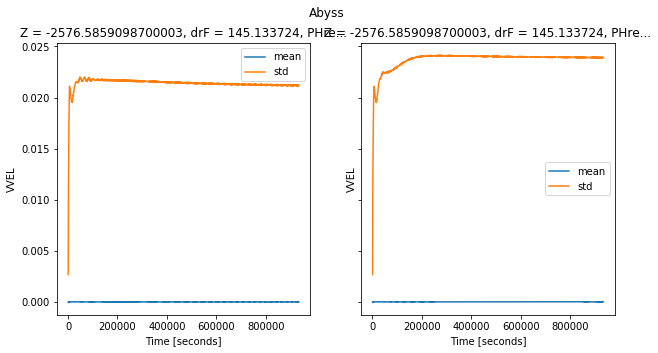

In [19]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['VVEL'][:,-10,:,:].mean(dim=['XC','YG']).plot(label='mean', ax=axarr[0])
ds['VVEL'][:,-10,:,:].std(dim=['XC','YG']).plot(label='std', ax=axarr[0])
axarr[0].legend()

ds_GM['VVEL'][:,-10,:,:].mean(dim=['XC','YG']).plot(label='mean', ax=axarr[1])
ds_GM['VVEL'][:,-10,:,:].std(dim=['XC','YG']).plot(label='std', ax=axarr[1])
axarr[1].legend()

fig.suptitle('Abyss')

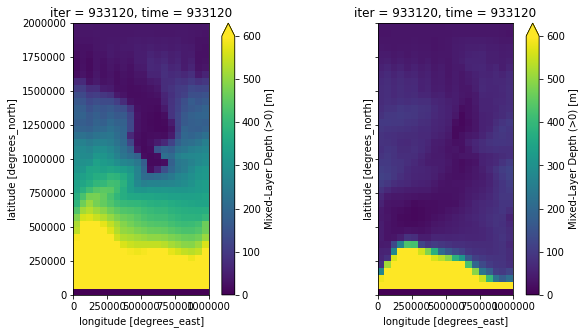

In [20]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['MXLDEPTH'][-1,:,:].plot(vmax=600, ax=axarr[0])
ds_GM['MXLDEPTH'][-1,:,:].plot(vmax=600, ax=axarr[1])

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

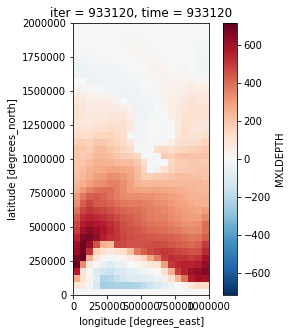

In [21]:
fig, axarr = plt.subplots(1, 1, figsize=(5,5))

(ds['MXLDEPTH'][-1,:,:] - ds_GM['MXLDEPTH'][-1,:,:]).plot()


axarr.set_aspect('equal')

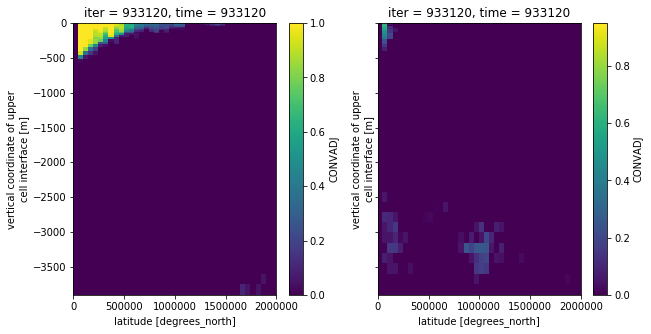

In [22]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ds['CONVADJ'][-1,:,:,:].mean(dim='XC').plot(ax=axarr[0])
ds_GM['CONVADJ'][-1,:,:,:].mean(dim='XC').plot(ax=axarr[1])

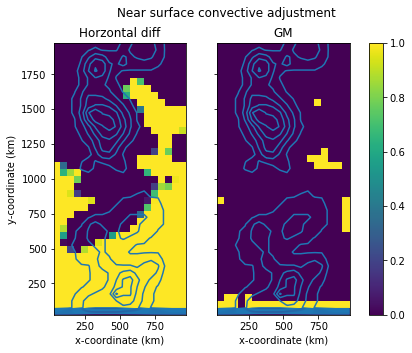

In [23]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(7,5))
fig.subplots_adjust(wspace=0.1)


axarr[0].pcolormesh(ds['XC']/1e3, ds['YC']/1e3,
                    ds['CONVADJ'][-1,1,:,:], vmin=0, vmax=1)
axarr[0].contour(ds['XC']/1e3, ds['YC']/1e3,
                    ds['Depth'], np.arange(0, 4500, 500), colors='C0')


axarr[0].set_xlabel('x-coordinate (km)')
axarr[0].set_ylabel('y-coordinate (km)')
axarr[0].set_title('Horzontal diff')
axarr[0].set_aspect('equal')


im = axarr[1].pcolormesh(ds_GM['XC']/1e3, ds_GM['YC']/1e3,
                    ds_GM['CONVADJ'][-1,1,:,:], vmin=0, vmax=1)
axarr[1].contour(ds_GM['XC']/1e3, ds_GM['YC']/1e3,
                    ds_GM['Depth'], np.arange(0, 4500, 500), colors='C0')

CB = plt.colorbar(im, ax=axarr)
axarr[1].set_xlabel('x-coordinate (km)')
axarr[1].set_title('GM')
axarr[1].set_aspect('equal')



fig.suptitle('Near surface convective adjustment')


fig.savefig('convadj.png', bbox_inches='tight', dpi=180)

In [24]:
# Overturning streamfunction
psi = (ds['VVEL']*ds['drF']*ds['dxG']).sum(dim='XC').cumsum(dim='Z')/1e6
psi_GM = (ds_GM['VVEL']*ds['drF']*ds['dxG']).sum(dim='XC').cumsum(dim='Z')/1e6

In [25]:
psi

<xarray.DataArray (time: 1080, Z: 49, YG: 40)>
dask.array<shape=(1080, 49, 40), dtype=float64, chunksize=(1, 49, 40)>
Coordinates:
  * YG       (YG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 1.85e+06 1.9e+06 1.95e+06
  * Z        (Z) >f8 -2.744 -8.584 -15.18 ... -3.609e+03 -3.758e+03 -3.908e+03
    drF      (Z) >f8 dask.array<shape=(49,), chunksize=(49,)>
    PHrefC   (Z) >f8 dask.array<shape=(49,), chunksize=(49,)>
    iter     (time) int64 dask.array<shape=(1080,), chunksize=(1,)>
  * time     (time) int64 864 1728 2592 3456 ... 930528 931392 932256 933120

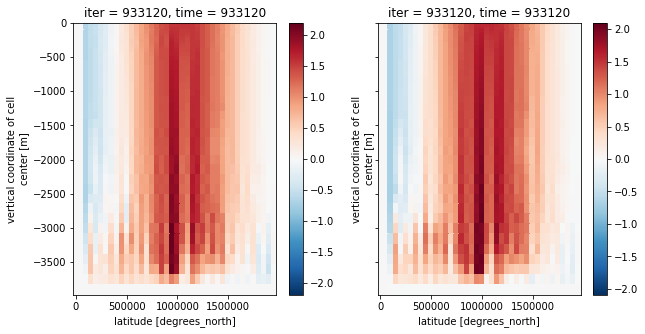

In [26]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

psi[-1,:,:].plot(ax=axarr[0])
psi_GM[-1,:,:].plot(ax=axarr[1])

## Package Layers diagnostics

### In density (temperature) space

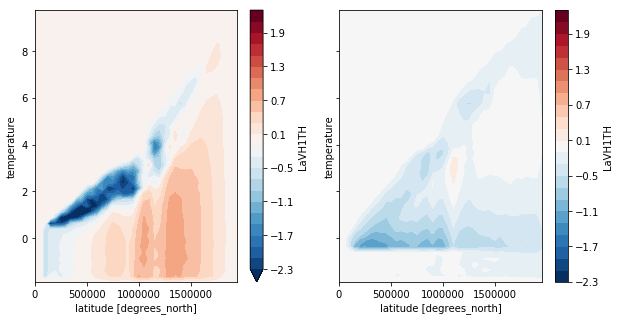

In [27]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(10,5))

t = -1
ds['LaVH1TH'][t:,::-1,:,:].mean(dim=['XC', 'time']).cumsum(dim='temperature').plot.contourf(
                        levels=np.linspace(-2.3,2.3,24), ax=axarr[0],)
ds_GM['LaVH1TH'][t:,::-1,:,:].mean(dim=['XC', 'time']).cumsum(dim='temperature').plot.contourf(
                        levels=np.linspace(-2.3,2.3,24), ax=axarr[1])

### In depth space

We need to do a little bit of work to get these fields to plot in depth space. Essentially, we need to know the zonal-mean depth of each layer. To calculate this, we take a cummulative sum of `LaHs1TH`, which is the layer thickness at the southern face of each cell.

In [28]:
# define the y coordinate grid for plotting
X, Y = np.meshgrid(ds['temperature'], ds['YG']/1e3)

/anaconda3/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/anaconda3/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


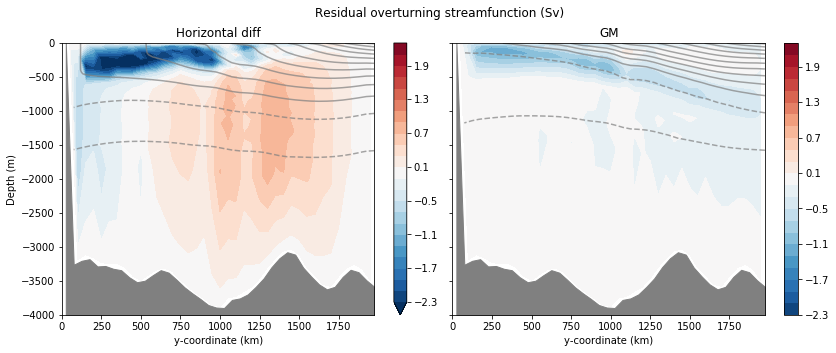

In [29]:
fig, axarr = plt.subplots(1, 2, sharey=True, figsize=(14,5))
fig.subplots_adjust(wspace=0.)

t = -1

im = axarr[0].contourf(Y, -ds['LaHs1TH'][t:,::-1,:,:].cumsum(dim='temperature').mean(dim=['XC', 'time']).values.T,
              ds['LaVH1TH'][t:,::-1,:,:].cumsum(dim='temperature').mean(dim=['XC', 'time']).values.T,
                    np.linspace(-2.3,2.3,24), vmin=-2.4, vmax=2.4, cmap='RdBu_r', extend='min')
plt.colorbar(im, ax=axarr[0])
axarr[0].contour(ds['YC']/1e3, ds['Z'], ds['THETA'][t:,:,:,:].where(
                        ds['hFacC']!=0).mean(dim=['XC', 'time']),
                np.arange(-2.5, 11, 1), colors='grey', alpha=0.7)
axarr[0].fill_between(ds['YC']/1e3, -4000, -ds['Depth'].mean(dim='XC'), color='grey')
axarr[0].set_title('Horizontal diff')
axarr[0].set_ylabel('Depth (m)')
axarr[0].set_xlabel('y-coordinate (km)')
axarr[0].set_ylim(-4000, 0)

im = axarr[1].contourf(Y, -ds_GM['LaHs1TH'][t:,::-1,:,:].cumsum(
                            dim='temperature').mean(dim=['XC', 'time']).values.T,
              ds_GM['LaVH1TH'][t:,::-1,:,:].cumsum(dim='temperature').mean(dim=['XC', 'time']).values.T,
                    np.linspace(-2.3,2.3,24), vmin=-2.4, vmax=2.4, cmap='RdBu_r')
plt.colorbar(im, ax=axarr[1])
axarr[1].contour(ds_GM['YC']/1e3, ds_GM['Z'], ds_GM['THETA'][t:,:,:,:].where(
                        ds_GM['hFacC']!=0).mean(dim=['XC', 'time']),
                np.arange(-2.5, 11, 1), colors='grey', alpha=0.7)
axarr[1].fill_between(ds['YC']/1e3, -4000, -ds['Depth'].mean(dim='XC'), color='grey')
axarr[1].set_title('GM')
axarr[1].set_xlabel('y-coordinate (km)')
axarr[1].set_ylim(-4000, 0)

fig.suptitle('Residual overturning streamfunction (Sv)')

fig.savefig('residual_overturning.png', bbox_inches='tight', dpi=180)